# Тема. Предсказание цены автомобиля (regression)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI_lesson/car_price/data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.Driven_Wheels

0         rear wheel drive
1         rear wheel drive
2         rear wheel drive
3         rear wheel drive
4         rear wheel drive
               ...        
11909      all wheel drive
11910      all wheel drive
11911      all wheel drive
11912      all wheel drive
11913    front wheel drive
Name: Driven_Wheels, Length: 11914, dtype: object

In [4]:
df.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.engine_fuel_type

0           premium unleaded (required)
1           premium unleaded (required)
2           premium unleaded (required)
3           premium unleaded (required)
4           premium unleaded (required)
                      ...              
11909       premium unleaded (required)
11910       premium unleaded (required)
11911       premium unleaded (required)
11912    premium unleaded (recommended)
11913                  regular unleaded
Name: engine_fuel_type, Length: 11914, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.duplicated().sum()

715

In [6]:
df.drop_duplicates(inplace=True)
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Exploratory data analysis (EDA)

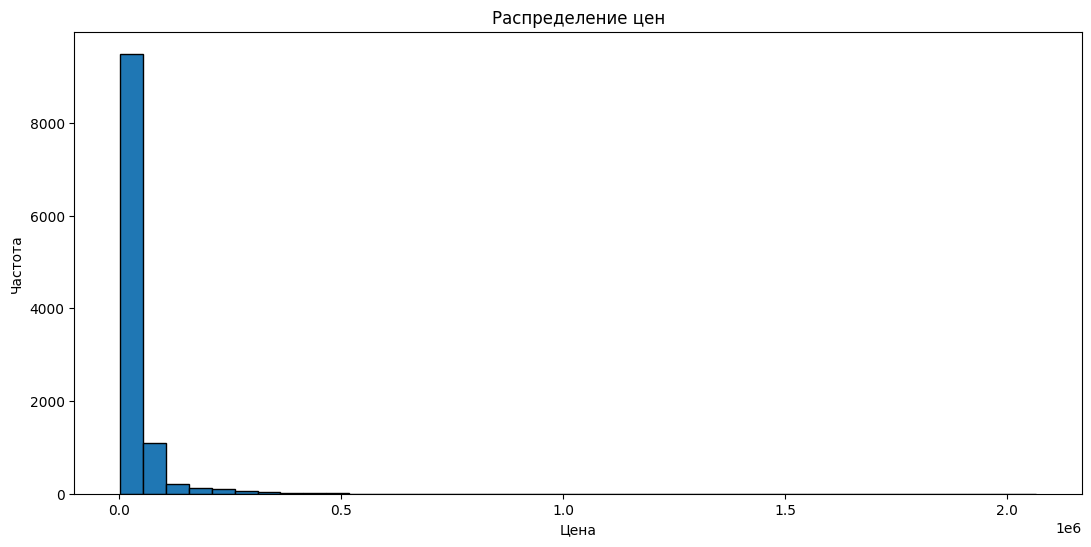

In [ ]:
plt.figure(figsize=(13, 6))

sns.histplot(df.msrp, bins=40, alpha=1)
plt.ylabel('Частота')
plt.xlabel('Цена')
plt.title('Распределение цен')

plt.show()

In [ ]:
df.msrp[df.msrp < 100000]

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 10567, dtype: int64

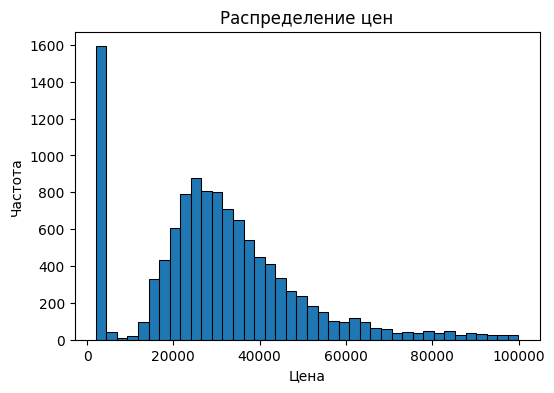

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, alpha=1)
plt.ylabel('Частота')
plt.xlabel('Цена')
plt.title('Распределение цен')

plt.show()

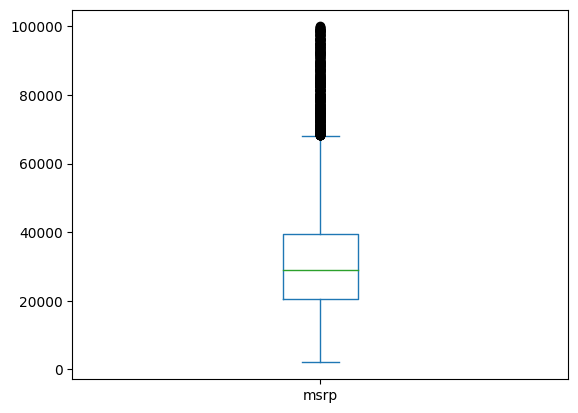

In [ ]:
df.msrp[df.msrp < 100000].plot(kind="box");

In [ ]:
np.log([0, 10, 1000 , 100000])

<ipython-input-85-48b8d23ae0b1>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 10, 1000 , 100000])


array([       -inf,  2.30258509,  6.90775528, 11.51292546])

In [ ]:
np.log1p([0, 10, 1000, 100000])

array([ 0.        ,  2.39789527,  6.90875478, 11.51293546])

In [ ]:
np.log1p(df.msrp)

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11199, dtype: float64

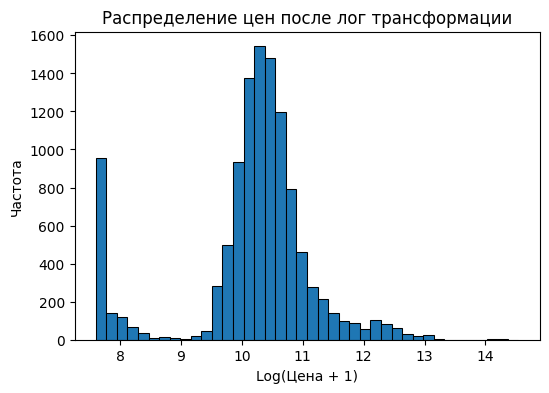

In [ ]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, alpha=1)
plt.ylabel('Частота')
plt.xlabel('Log(Цена + 1)')
plt.title('Распределение цен после лог трансформации')

plt.show()

In [ ]:
log_price.describe()

count    11914.000000
mean        10.113729
std          1.105703
min          7.601402
25%          9.952325
50%         10.308819
75%         10.650939
max         14.541078
Name: msrp, dtype: float64

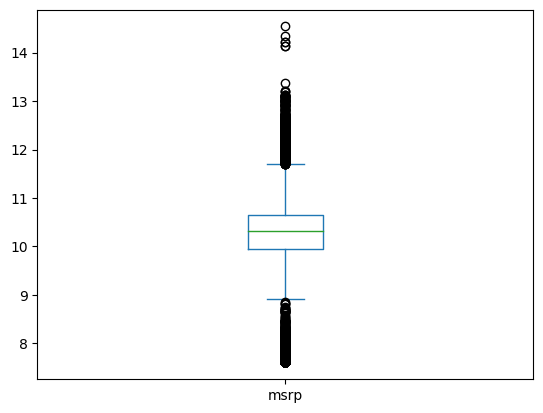

In [ ]:
log_price.plot(kind="box");

<Axes: xlabel='year', ylabel='Count'>

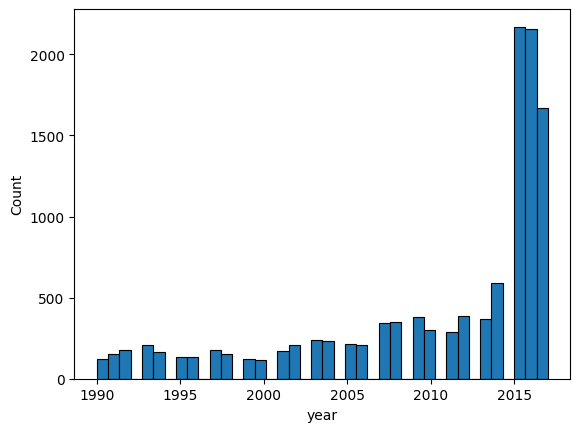

In [ ]:
sns.histplot(df.year, bins=40, alpha=1)

<Axes: xlabel='popularity', ylabel='Count'>

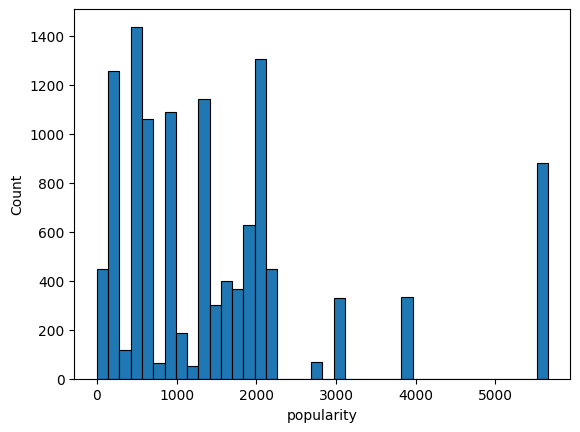

In [ ]:
sns.histplot(df.popularity, bins=40, alpha=1)

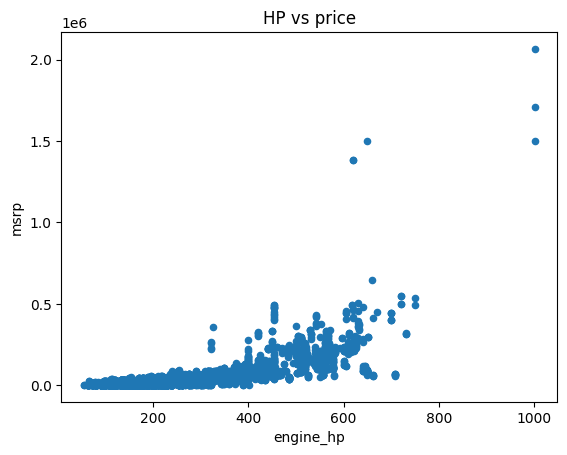

In [ ]:
df.plot(kind='scatter', x='engine_hp', y='msrp', title='HP vs price');

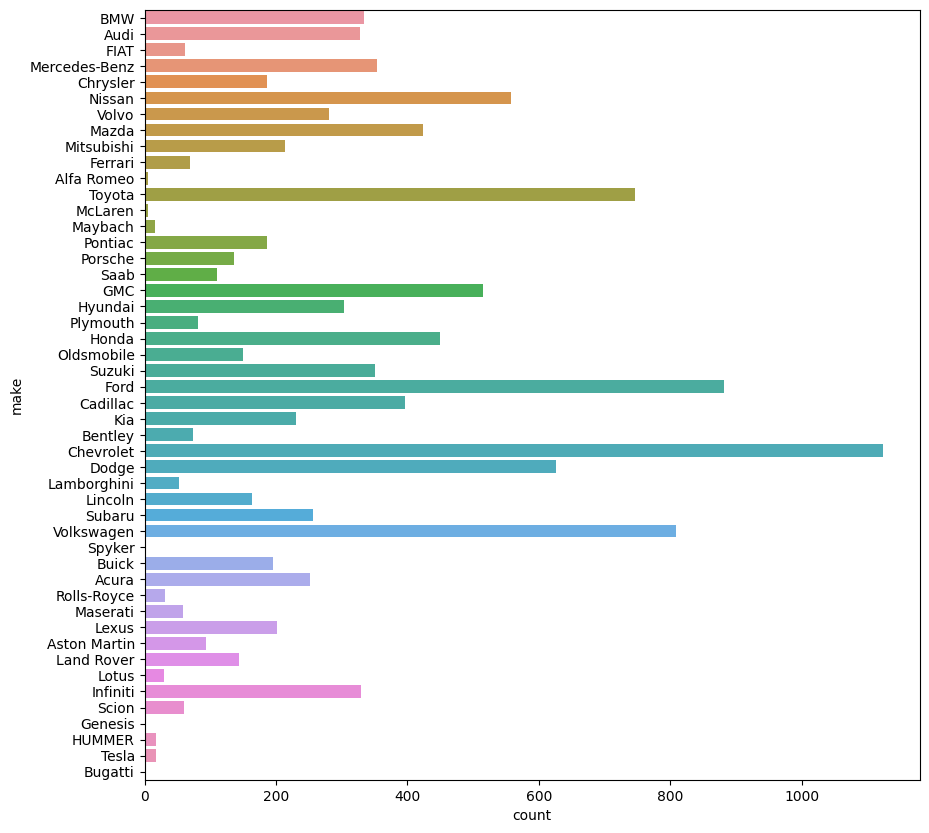

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, y='make')
plt.show()

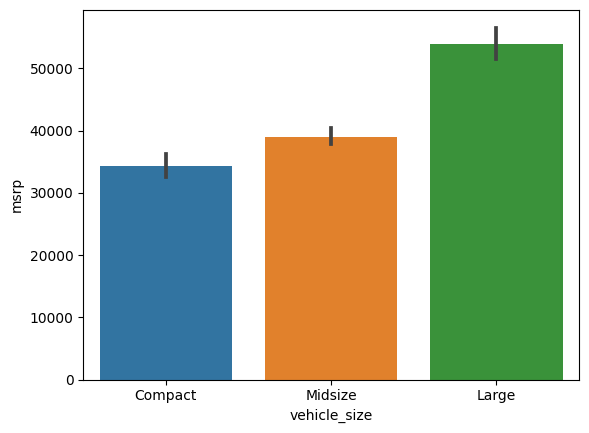

In [ ]:
sns.barplot(data=df, x='vehicle_size', y='msrp')
plt.show()

<ipython-input-28-afe41e0a119b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


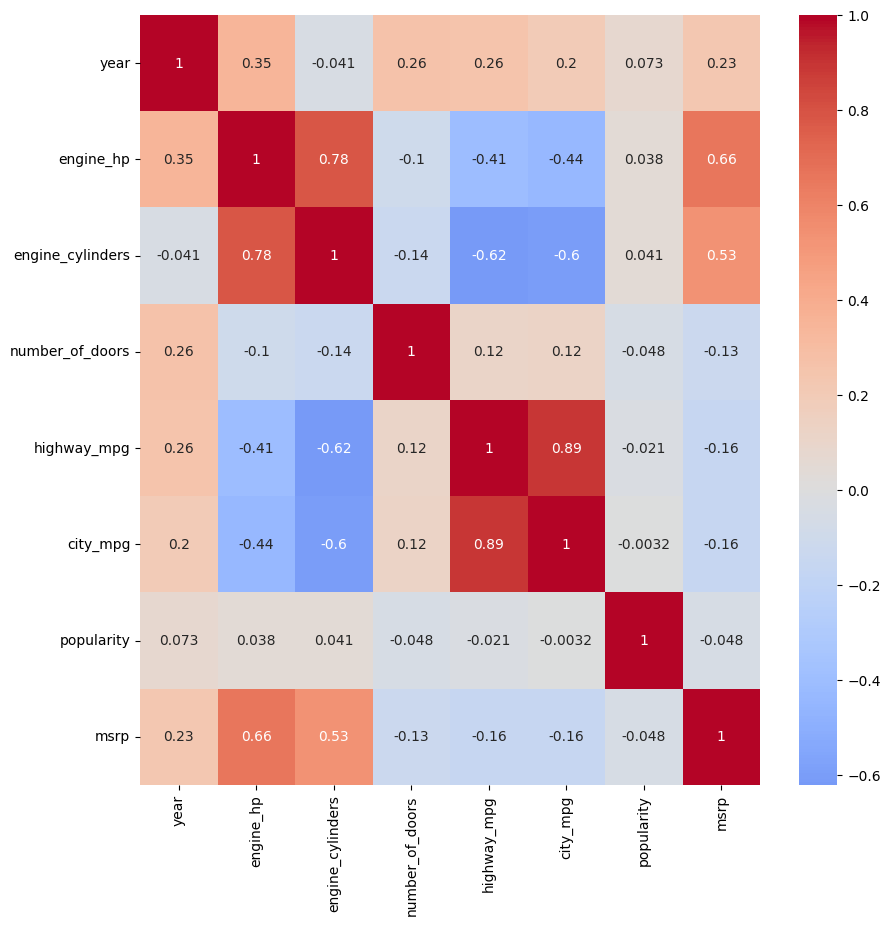

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

# Импутация пропусков

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
df[['engine_fuel_type', 'engine_hp','engine_cylinders','number_of_doors', 'market_category']]

,engine_fuel_type,engine_hp,engine_cylinders,number_of_doors,market_category
0,premium unleaded (required),335.0,6.0,2.0,"Factory Tuner,Luxury,High-Performance"
1,premium unleaded (required),300.0,6.0,2.0,"Luxury,Performance"
2,premium unleaded (required),300.0,6.0,2.0,"Luxury,High-Performance"
3,premium unleaded (required),230.0,6.0,2.0,"Luxury,Performance"
4,premium unleaded (required),230.0,6.0,2.0,Luxury
...,...,...,...,...,...
11909,premium unleaded (required),300.0,6.0,4.0,"Crossover,Hatchback,Luxury"
11910,premium unleaded (required),300.0,6.0,4.0,"Crossover,Hatchback,Luxury"
11911,premium unleaded (required),300.0,6.0,4.0,"Crossover,Hatchback,Luxury"
11912,premium unleaded (recommended),300.0,6.0,4.0,"Crossover,Hatchback,Luxury"


In [ ]:
df['engine_fuel_type'].value_counts()

regular unleaded                                6658
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

In [ ]:
df['engine_fuel_type'].mode()[0]

'regular unleaded'

In [7]:
df['engine_fuel_type'] = df['engine_fuel_type'].fillna(df['engine_fuel_type'].mode()[0])

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        0
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
~df['engine_hp'].isna()

0        True
1        True
2        True
3        True
4        True
         ... 
11909    True
11910    True
11911    True
11912    True
11913    True
Name: engine_hp, Length: 11199, dtype: bool

In [8]:
electric_with_hp = df[(df['engine_fuel_type'] == 'electric') & (df['engine_hp'] != 0.0) & (~df['engine_hp'].isna())]
electric_with_hp

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995


In [9]:
electric_with_hp['engine_hp'].mean()

145.3181818181818

In [10]:
df['engine_hp'] = df['engine_hp'].fillna(electric_with_hp['engine_hp'].mean())

In [ ]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [11]:
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

In [12]:
df['number_of_doors'].median()

4.0

In [13]:
df['number_of_doors'] = df['number_of_doors'].fillna(df['number_of_doors'].median())

In [14]:
df.drop('market_category', axis = 1, inplace = True)
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [15]:
df.reset_index(drop=True, inplace=True)
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


## Структура проверки (разделить данные на train, test, valid)

In [ ]:
np.random.seed(2)

n = len(df)
n

11199

In [ ]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [ ]:
n_val,n_test, n_train

(2239, 2239, 6721)

In [ ]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11196, 11197, 11198])

In [ ]:
np.random.shuffle(idx)
idx

array([4159, 6459, 8029, ..., 2636, 2255, 3212])

In [ ]:
df_shuffled = df.iloc[idx]
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4159,Ford,Explorer Sport,2003,regular unleaded,203.0,6.0,AUTOMATIC,four wheel drive,2.0,Midsize,2dr SUV,18,14,5657,26915
6459,Mitsubishi,Mirage G4,2017,regular unleaded,78.0,3.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,42,35,436,16995
8029,Acura,RL,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,24,17,204,56150
6333,Lincoln,Mark LT,2008,regular unleaded,300.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Crew Cab Pickup,16,12,61,38915
7199,Honda,Pilot,2017,regular unleaded,280.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,27,19,2202,36455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,22,17,2031,43400
1109,GMC,Acadia,2015,regular unleaded,288.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,24,17,549,47690
2636,Chevrolet,Colorado,2016,regular unleaded,305.0,6.0,AUTOMATIC,four wheel drive,4.0,Compact,Crew Cab Pickup,24,17,1385,30665
2255,Porsche,Cayman,2016,premium unleaded (required),325.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,1715,64100


In [ ]:
df_shuffled.iloc[:n_train]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4159,Ford,Explorer Sport,2003,regular unleaded,203.0,6.0,AUTOMATIC,four wheel drive,2.0,Midsize,2dr SUV,18,14,5657,26915
6459,Mitsubishi,Mirage G4,2017,regular unleaded,78.0,3.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,42,35,436,16995
8029,Acura,RL,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,24,17,204,56150
6333,Lincoln,Mark LT,2008,regular unleaded,300.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Crew Cab Pickup,16,12,61,38915
7199,Honda,Pilot,2017,regular unleaded,280.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,27,19,2202,36455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,Cadillac,CTS,2015,premium unleaded (recommended),272.0,4.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,28,19,1624,57670
5657,Oldsmobile,Intrigue,2000,regular unleaded,215.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,26,17,26,2290
1167,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,45,50,2202,29155
3869,Lexus,ES 350,2015,regular unleaded,268.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,31,21,454,37700


In [ ]:
df_shuffled.iloc[n_train:n_train+n_val]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3765,GMC,Envoy XL,2005,regular unleaded,275.0,6.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,17,12,549,36060
10082,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Large,Passenger Van,19,14,5657,40925
493,BMW,5 Series Gran Turismo,2017,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,4dr Hatchback,26,18,3916,63200
3560,Toyota,ECHO,2005,regular unleaded,108.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,38,30,2031,10455
7224,Toyota,Previa,1995,regular unleaded,161.0,4.0,AUTOMATIC,rear wheel drive,3.0,Compact,Passenger Minivan,20,16,2031,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,Plymouth,Neon,2000,regular unleaded,132.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,31,24,535,2000
3804,Volkswagen,Eos,2015,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Compact,Convertible,30,22,873,36145
10874,Volvo,XC60,2016,regular unleaded,250.0,5.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,26,19,870,38100
9421,Cadillac,STS,2011,regular unleaded,302.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,27,18,1624,56380


In [ ]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4159,Ford,Explorer Sport,2003,regular unleaded,203.0,6.0,AUTOMATIC,four wheel drive,2.0,Midsize,2dr SUV,18,14,5657,26915
6459,Mitsubishi,Mirage G4,2017,regular unleaded,78.0,3.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,42,35,436,16995
8029,Acura,RL,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,24,17,204,56150
6333,Lincoln,Mark LT,2008,regular unleaded,300.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Crew Cab Pickup,16,12,61,38915
7199,Honda,Pilot,2017,regular unleaded,280.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,27,19,2202,36455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,Cadillac,CTS,2015,premium unleaded (recommended),272.0,4.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,28,19,1624,57670
5657,Oldsmobile,Intrigue,2000,regular unleaded,215.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,26,17,26,2290
1167,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,45,50,2202,29155
3869,Lexus,ES 350,2015,regular unleaded,268.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,31,21,454,37700


In [ ]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3765,GMC,Envoy XL,2005,regular unleaded,275.0,6.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,17,12,549,36060
10082,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Large,Passenger Van,19,14,5657,40925
493,BMW,5 Series Gran Turismo,2017,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,4dr Hatchback,26,18,3916,63200
3560,Toyota,ECHO,2005,regular unleaded,108.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,38,30,2031,10455
7224,Toyota,Previa,1995,regular unleaded,161.0,4.0,AUTOMATIC,rear wheel drive,3.0,Compact,Passenger Minivan,20,16,2031,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,Plymouth,Neon,2000,regular unleaded,132.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,31,24,535,2000
3804,Volkswagen,Eos,2015,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Compact,Convertible,30,22,873,36145
10874,Volvo,XC60,2016,regular unleaded,250.0,5.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,26,19,870,38100
9421,Cadillac,STS,2011,regular unleaded,302.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,27,18,1624,56380


In [ ]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
5843,Dodge,Journey,2015,regular unleaded,173.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,26,19,1851,26595
2011,Kia,Cadenza,2015,regular unleaded,293.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,28,19,1720,34900
382,Mazda,3,2016,regular unleaded,155.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,41,29,586,20045
8596,Suzuki,Sidekick,1996,regular unleaded,120.0,4.0,MANUAL,four wheel drive,4.0,Compact,4dr SUV,23,20,481,2000
6288,Dodge,Magnum,2008,regular unleaded,340.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Wagon,23,15,1851,31780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,22,17,2031,43400
1109,GMC,Acadia,2015,regular unleaded,288.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,24,17,549,47690
2636,Chevrolet,Colorado,2016,regular unleaded,305.0,6.0,AUTOMATIC,four wheel drive,4.0,Compact,Crew Cab Pickup,24,17,1385,30665
2255,Porsche,Cayman,2016,premium unleaded (required),325.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,1715,64100


In [ ]:
np.log1p(20045)

9.905784911584812

In [ ]:
df_train.msrp.values

array([26915, 16995, 56150, ..., 29155, 37700, 47200])

In [ ]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
y_train

array([10.20047618,  9.7407333 , 10.93579977, ..., 10.280416  ,
       10.5374419 , 10.76217036])

In [ ]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
5843,Dodge,Journey,2015,regular unleaded,173.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,26,19,1851
2011,Kia,Cadenza,2015,regular unleaded,293.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,28,19,1720
382,Mazda,3,2016,regular unleaded,155.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,41,29,586
8596,Suzuki,Sidekick,1996,regular unleaded,120.0,4.0,MANUAL,four wheel drive,4.0,Compact,4dr SUV,23,20,481
6288,Dodge,Magnum,2008,regular unleaded,340.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Wagon,23,15,1851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,22,17,2031
1109,GMC,Acadia,2015,regular unleaded,288.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,24,17,549
2636,Chevrolet,Colorado,2016,regular unleaded,305.0,6.0,AUTOMATIC,four wheel drive,4.0,Compact,Crew Cab Pickup,24,17,1385
2255,Porsche,Cayman,2016,premium unleaded (required),325.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,1715


In [ ]:
y_test

array([10.18851611, 10.46027076,  9.90578491, ..., 10.33090983,
       11.06821524, 10.36220903])

# Sklearn train_test_split

In [16]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=a438965fa278d225ad074e3b80456408ce9dca1a8ee30b02d5fd7cc7f4f88e9d
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
df[df.columns[:-1]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204
11195,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204
11196,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204
11197,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test_and_valid, y_train, y_test_and_valid = train_test_split(df[df.columns[:-1]], df.msrp,test_size=0.4, random_state=42)

In [ ]:
y_test

3532    34160
2899    33395
3822    19299
5846    25195
9036    54925
        ...  
4602    28095
1172    29605
4484    20265
8313    53100
7259    26675
Name: msrp, Length: 4480, dtype: int64

In [65]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test_and_valid, y_test_and_valid, test_size=0.5, random_state=42)

In [ ]:
len(X_train), len(X_test), len(X_valid)

(6719, 2240, 2240)

In [ ]:
len(y_train), len(y_test), len(y_valid)

(6719, 2240, 2240)

In [ ]:
X_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
4505,Ford,Five Hundred,2007,regular unleaded,203.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,26,19,5657
9089,Mercedes-Benz,SLK-Class,2014,premium unleaded (required),201.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,32,22,617
2542,Acura,CL,2002,premium unleaded (required),225.0,6.0,AUTOMATIC,front wheel drive,2.0,Midsize,Coupe,27,17,204
9572,Toyota,Tacoma,2016,regular unleaded,278.0,6.0,AUTOMATIC,four wheel drive,4.0,Compact,Extended Cab Pickup,23,18,2031
10611,Buick,Verano,2016,regular unleaded,180.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,32,21,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,Buick,Encore,2017,regular unleaded,138.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,34,28,155
3063,Cadillac,CTS Wagon,2013,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Wagon,26,18,1624
8094,Volkswagen,Routan,2010,regular unleaded,251.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,25,17,873
2540,Acura,CL,2001,premium unleaded (required),225.0,6.0,AUTOMATIC,front wheel drive,2.0,Midsize,Coupe,27,17,204


In [62]:
y_train

5730    10.148823
5707    10.214495
4695    10.197686
9583    10.361735
1410    10.961122
          ...    
5734     9.966275
5191    10.204740
5390    10.196008
860      7.601402
7270    10.175459
Name: msrp, Length: 6719, dtype: float64

In [ ]:
X_valid

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
10699,Ford,Transit Wagon,2015,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,19,14,5657
220,Chrysler,300,2016,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013
1895,Volkswagen,Beetle,2015,premium unleaded (recommended),210.0,4.0,MANUAL,front wheel drive,2.0,"Hatchback,Performance",Compact,2dr Hatchback,31,23,873
2531,Honda,Civic CRX,1991,regular unleaded,108.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,30,24,2202
278,Nissan,350Z,2008,regular unleaded,306.0,6.0,AUTOMATIC,rear wheel drive,2.0,High-Performance,Compact,Convertible,23,17,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,Suzuki,XL-7,2004,regular unleaded,185.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Midsize,4dr SUV,20,15,481
4305,Infiniti,EX,2012,premium unleaded (recommended),297.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,24,17,190
8709,Mazda,RX-8,2010,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586
4215,Ford,Escort,2003,regular unleaded,130.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,30,23,5657


In [66]:
y_train_orig = y_train
y_valid_orig = y_valid
y_test_orig = y_test

y_train = np.log1p(y_train)
y_valid = np.log1p(y_valid)
y_test = np.log1p(y_test)

In [ ]:
y_valid

10043    10.381924
208      10.470391
1803     10.263816
2377      7.601402
265      10.644972
           ...    
10952    10.146434
4076     10.584081
8187     10.376954
3989      9.603125
4475      9.948748
Name: msrp, Length: 2240, dtype: float64

## Линейная регрессия (Linear regression)

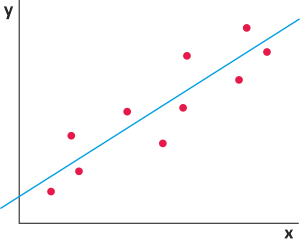



```
y = b + kx
```
* y – зависимая (целевая) переменная

* x – независимая переменная (регрессор)

* k – коэффициент наклона (тангенс угла наклона – определяет наклон линии относительно оси абсцисс (x) )

* b – отрезок или свободный коэффициент (определяет смещение линии относительно оси абсцисс (x) и где линия пересекает ось ординат (y) )


В машинном обучении коэффициенты (`k` и `b`) принято называть весами (от англ. weight) и обозначать буквой `w`:

image.png



В трехмерном пространстве линейная функция будет иметь вид:

image.png

А графически это будет плоскость:

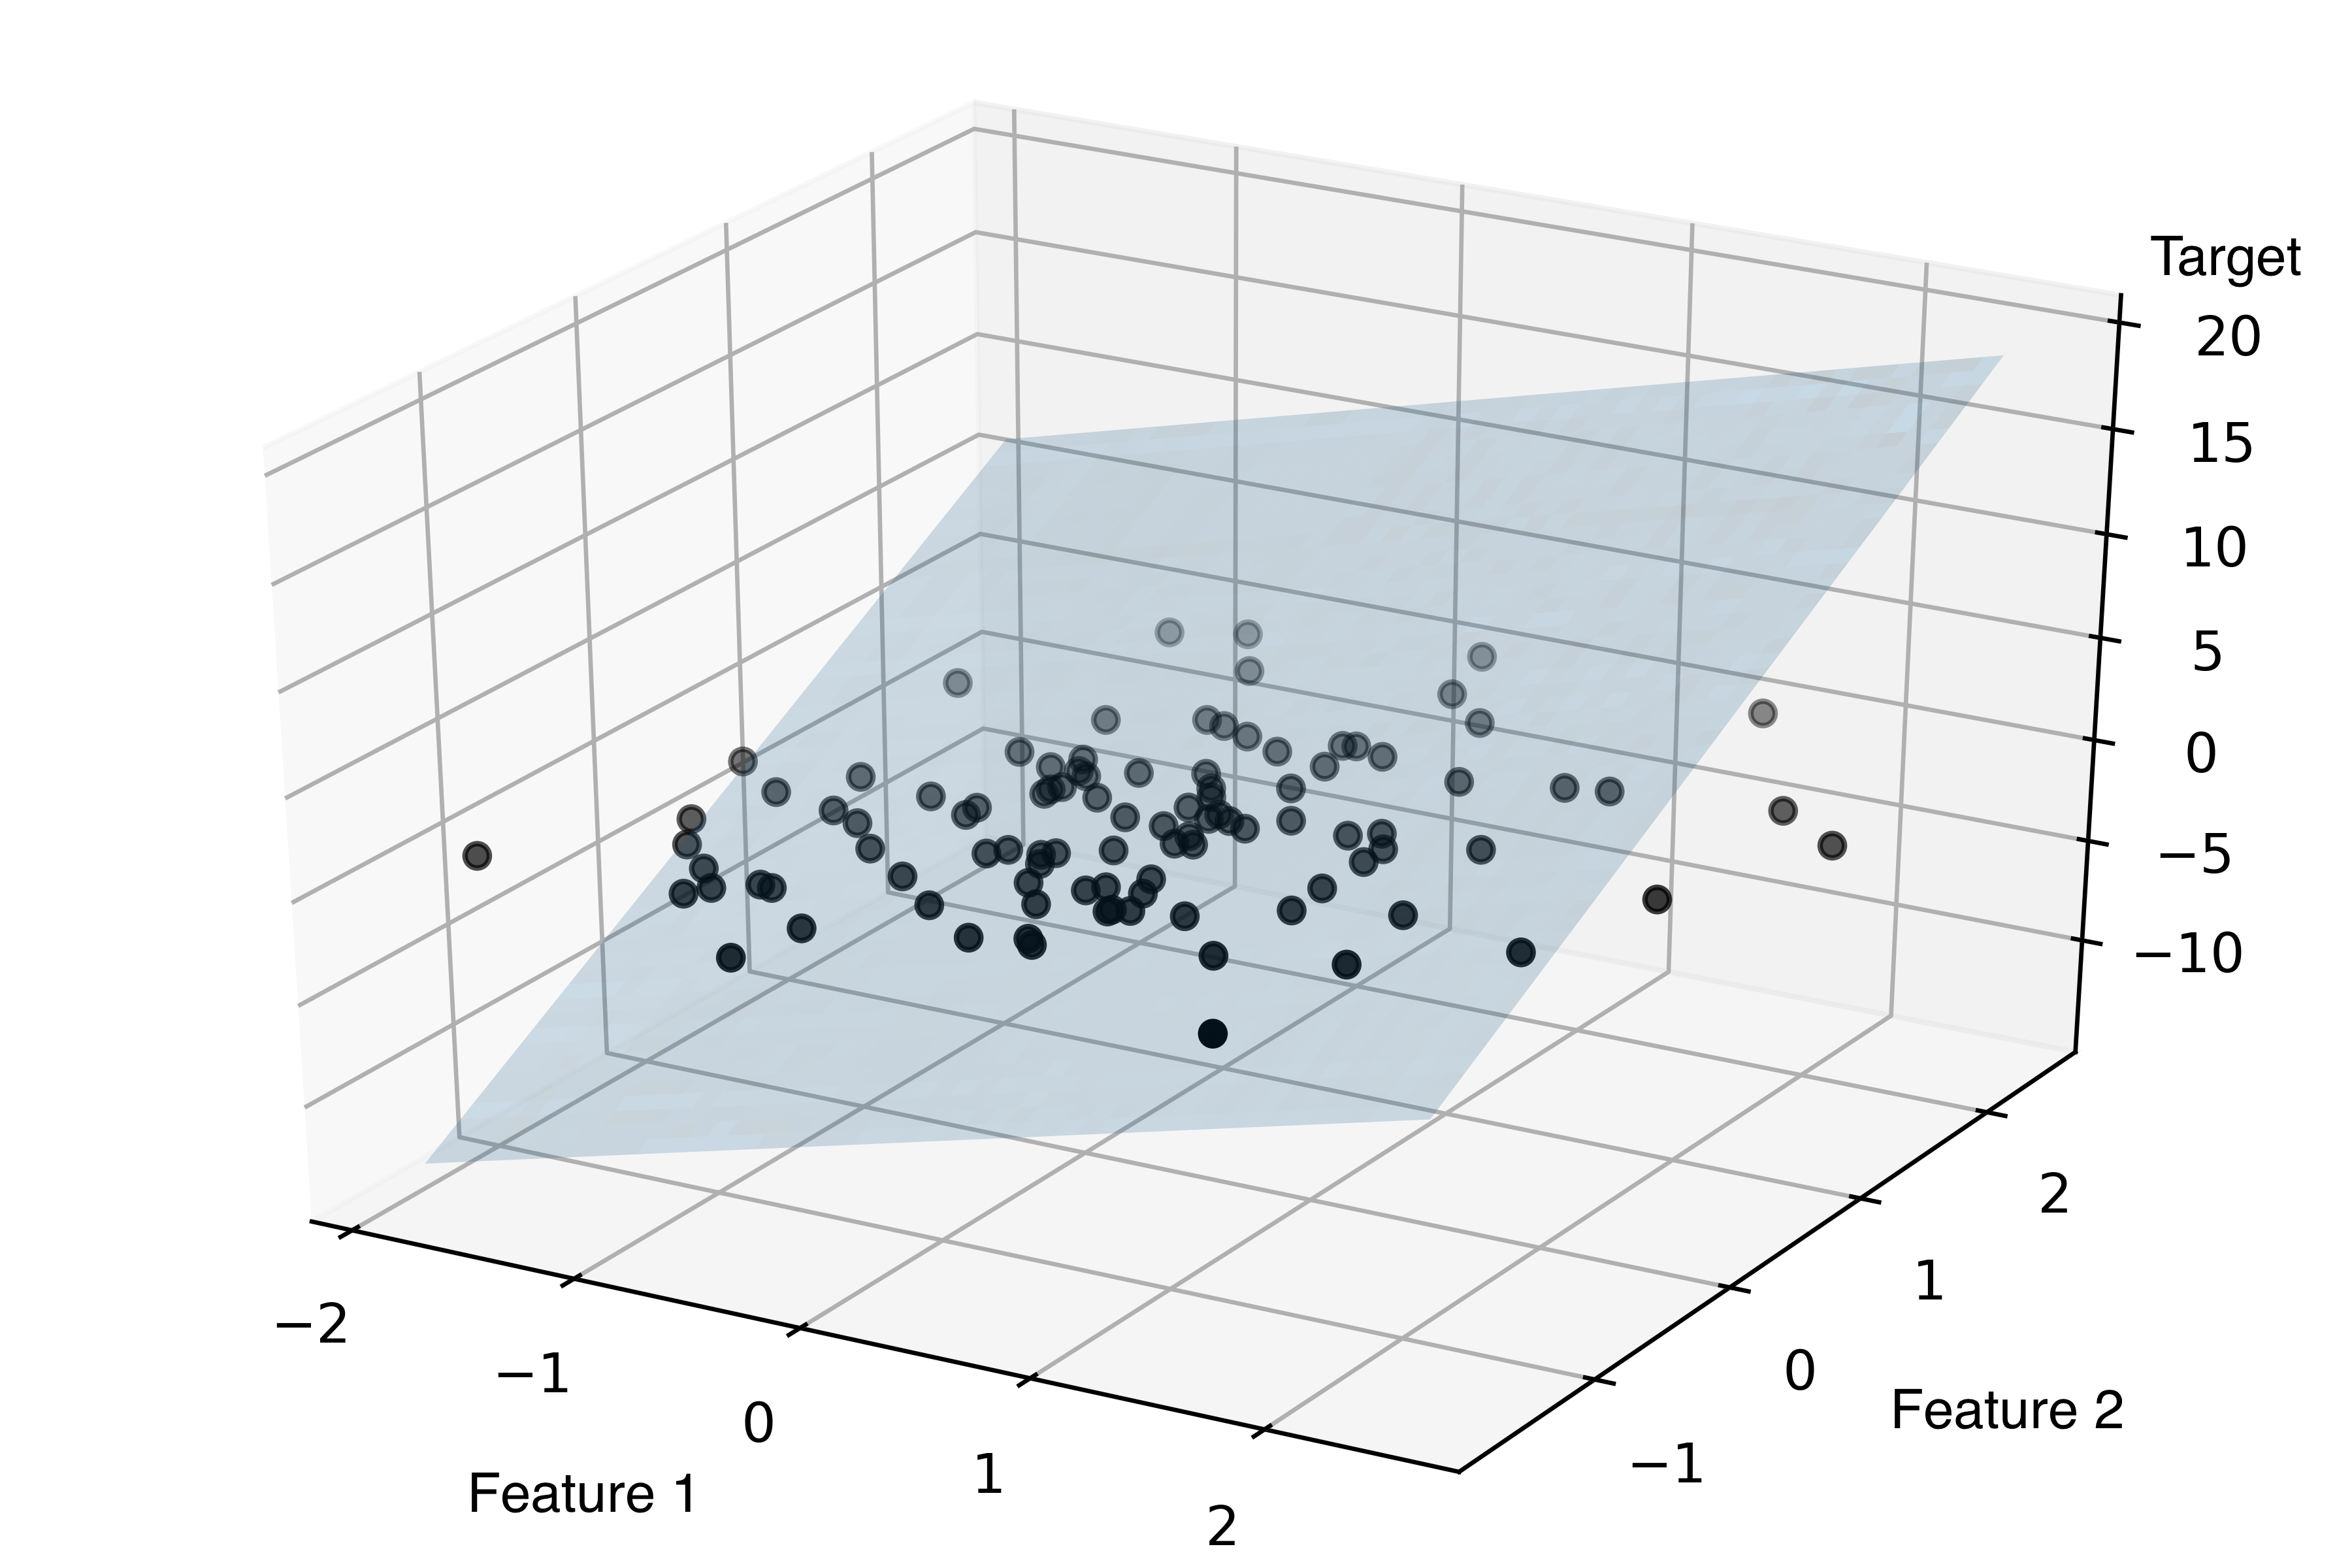

В m-мерном пространстве функция будет такой (а "графически" это будет гиперплоскость):

image.png



Здесь каждая `x` это отдельная фича, а `m` – количество фичей. Соответственно, количество весов напрямую зависит от количества фичей. И наша задача – подобрать такие веса `w`, которые дадут наилучший результат при предсказании. Что такое «наилучший», рассмотрим на следующем шаге.

In [67]:
X_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
5730,Volkswagen,Jetta Hybrid,2014,premium unleaded (required),170.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,48,42,873
5707,Volkswagen,Jetta GLI,2013,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,32,24,873
4695,Ford,Freestyle,2005,regular unleaded,203.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Wagon,22,17,5657
9583,Toyota,Tacoma,2016,regular unleaded,278.0,6.0,AUTOMATIC,rear wheel drive,4.0,Compact,Crew Cab Pickup,24,19,2031
1410,Nissan,Armada,2017,regular unleaded,390.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr SUV,19,14,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Volkswagen,Jetta SportWagen,2012,regular unleaded,170.0,5.0,AUTOMATIC,front wheel drive,4.0,Compact,Wagon,31,24,873
5191,Volkswagen,Golf SportWagen,2017,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Wagon,34,25,873
5390,Volkswagen,GTI,2013,premium unleaded (recommended),200.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,31,21,873
860,Saab,900,1996,regular unleaded,185.0,4.0,MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,23,15,376


In [68]:
X_train.iloc[10]

make                                           Saab
model                                           9-3
year                                           2010
engine_fuel_type     premium unleaded (recommended)
engine_hp                                     207.0
engine_cylinders                                4.0
transmission_type                         AUTOMATIC
driven_wheels                     front wheel drive
number_of_doors                                 4.0
vehicle_size                                Compact
vehicle_style                                 Wagon
highway_mpg                                      27
city_mpg                                         19
popularity                                      376
Name: 815, dtype: object

In [69]:
xi = [207.0, 19, 376]

In [70]:
def g(xi):
    # предсказывания
    return 10000

In [71]:
g(xi)

10000

In [75]:
w0 = 7.17
w = [0.01, -0.04, 0.002]

In [76]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n): # 0,1,2
      pred += w[j]*xi[j]
    return pred

In [77]:
linear_regression(xi)

9.232000000000001

In [80]:
np.expm1(linear_regression(xi))

10217.959005417073

In [79]:
y_train.iloc[10]

10.519240598188375

In [85]:
np.expm1(y_train.iloc[10])

37019.99999999999

In [86]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n): # 0,1,2
      res += w[j]*xi[j]
    return res

In [87]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [88]:
linear_regression(xi)

9.232

In [89]:
def linear_regression(xi):
    w_new = [w0] + w # [7.17, 0.01, -0.04, 0.002]
    xi = [1] + xi    # [1, 207.0, 19, 376]
    return dot(xi, w_new)

In [90]:
linear_regression(xi)

9.232000000000001

In [91]:
X = [
    [1, 207.0, 19, 376],
    [1, 345.0, 10, 1245],
    [1, 147.0, 25, 4355],
]
X = np.array(X)
X

array([[1.000e+00, 2.070e+02, 1.900e+01, 3.760e+02],
       [1.000e+00, 3.450e+02, 1.000e+01, 1.245e+03],
       [1.000e+00, 1.470e+02, 2.500e+01, 4.355e+03]])

In [93]:
w_new = [w0] + w
w_new

[7.17, 0.01, -0.04, 0.002]

In [94]:
X.dot(w_new)

array([ 9.232, 12.71 , 16.35 ])

In [95]:
def linear_regression(X):
    return X.dot(w_new)


In [106]:
linear_regression(X)

array([ 9.232, 12.71 , 16.35 ])

# Метод наименьших квадратов

image.png

Но таких зависимостей может быть много. Как определить какая из них наилучшая?

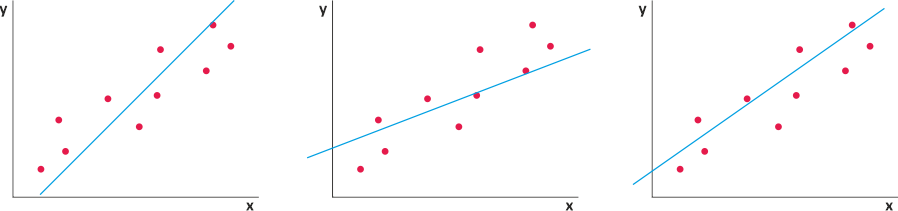

Один из способов найти наилучшую зависимость – **Метод наименьших квадратов** (МНК, Least squares) – математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений выходных значений некоторой функции от исходных значений.

Часто для реализации МНК используется функция `MSE` (от англ. Mean Squared Error – средняя квадратичная ошибка), которой воспользуемся и мы. MSE записывается так:

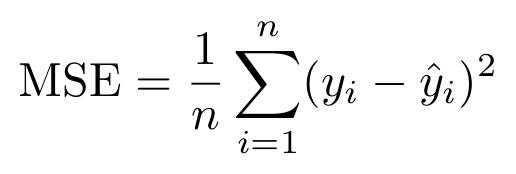

* y  – фактическое целевое значение
* y^ – значение, предсказанное моделью
* n – число наблюдений (записей в таблице)

Графически это можно изобразить следующим образом:

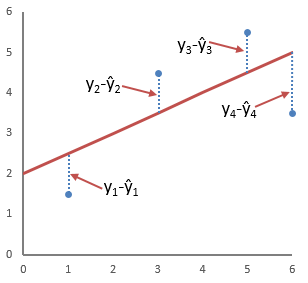

И задача линейной регрессии подобрать такие веса `w`, при которых подстановка фичей в линейную функцию выдавала бы минимальные ошибки как для каждого отдельного примера, так и в целом для всех примеров.

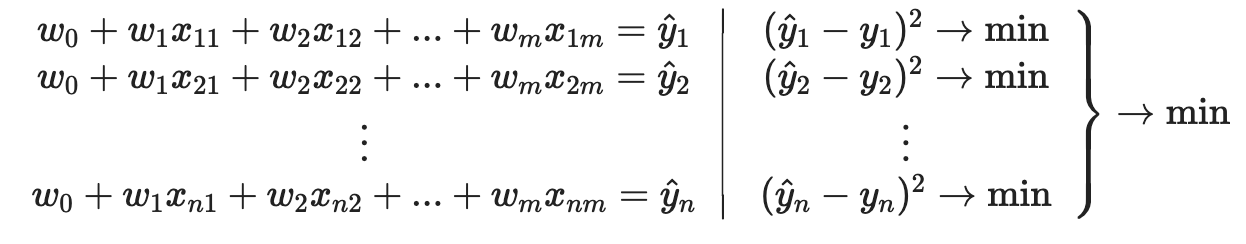


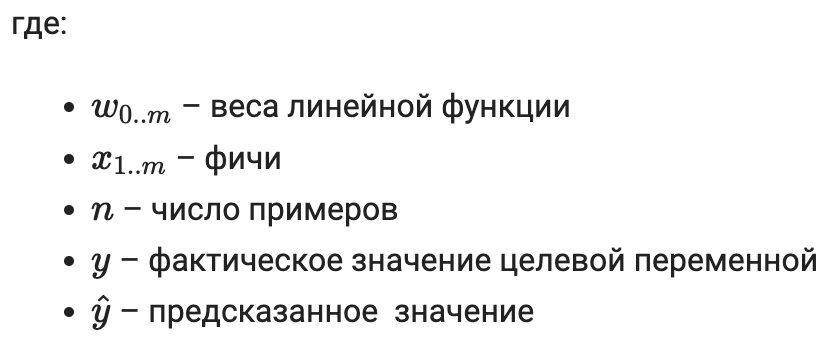

Функция, которая используется для оптимизации модели и считает ошибки предсказаний, называется **Функцией потерь** (**Loss function**). В данном случае это — MSE.

# Аналитическое решение

Для линейной регрессии существует т.н. аналитическое решение метода наименьших квадратов:

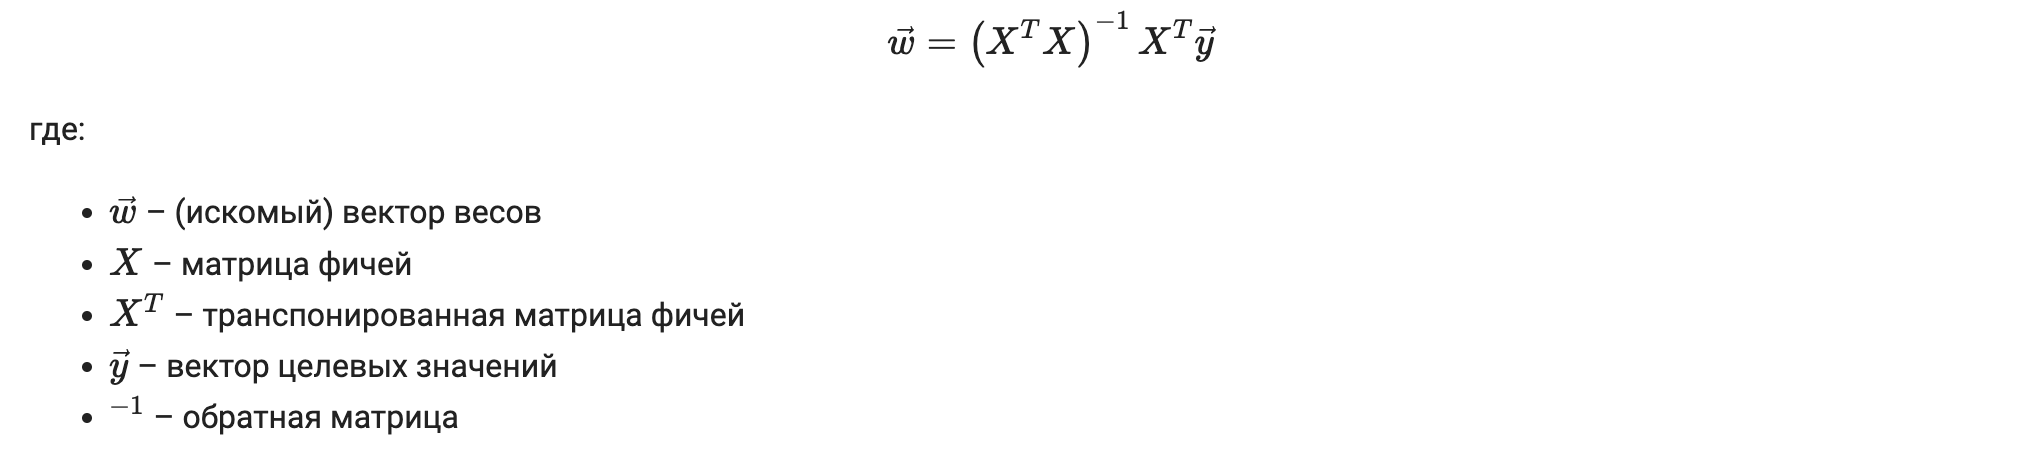

Аналитическое решение обладает рядом ограничений (можете самостоятельно найти их «в этих ваших интернетах»). Но больше всего нас волнует то, что оно **очень дорогое с т.з. вычислительных ресурсов** и на практике используется редко.

# Градиентный спуск (Gradient Descent)

Градиентный спуск — это метод итерационного нахождения минимума функции.

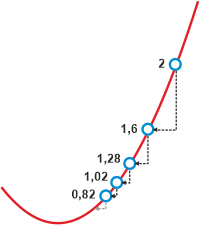

* https://habr.com/ru/articles/471458/
* https://machinelearningmastery.ru/linear-regression-using-gradient-descent-97a6c8700931/
* https://www.youtube.com/watch?v=e7Ic4zLWYxc&t=566s&ab_channel=%D0%94%D0%B0%D1%82%D0%B0%D0%91%D0%BE%D0%B9

# Моделирование

In [46]:
X_train, X_test_and_valid, y_train, y_test_and_valid = train_test_split(df[df.columns[:-1]], df.msrp,test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_and_valid, y_test_and_valid, test_size=0.5, random_state=42)

y_train_orig = y_train
y_valid_orig = y_valid
y_test_orig = y_test

y_train = np.log1p(y_train)
y_valid = np.log1p(y_valid)
y_test = np.log1p(y_test)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [97]:
X_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
5730,Volkswagen,Jetta Hybrid,2014,premium unleaded (required),170.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,48,42,873
5707,Volkswagen,Jetta GLI,2013,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,32,24,873
4695,Ford,Freestyle,2005,regular unleaded,203.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Wagon,22,17,5657
9583,Toyota,Tacoma,2016,regular unleaded,278.0,6.0,AUTOMATIC,rear wheel drive,4.0,Compact,Crew Cab Pickup,24,19,2031
1410,Nissan,Armada,2017,regular unleaded,390.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr SUV,19,14,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Volkswagen,Jetta SportWagen,2012,regular unleaded,170.0,5.0,AUTOMATIC,front wheel drive,4.0,Compact,Wagon,31,24,873
5191,Volkswagen,Golf SportWagen,2017,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Wagon,34,25,873
5390,Volkswagen,GTI,2013,premium unleaded (recommended),200.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,31,21,873
860,Saab,900,1996,regular unleaded,185.0,4.0,MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,23,15,376


In [98]:
feature_columns = ['year', 'engine_hp', 'engine_cylinders', 'city_mpg', 'popularity']
X_train, X_test = X_train[feature_columns], X_test[feature_columns]

In [99]:
X_test

,year,engine_hp,engine_cylinders,city_mpg,popularity
4505,2007,203.0,6.0,19,5657
9089,2014,201.0,4.0,22,617
2542,2002,225.0,6.0,17,204
9572,2016,278.0,6.0,18,2031
10611,2016,180.0,4.0,21,155
...,...,...,...,...,...
3732,2017,138.0,4.0,28,155
3063,2013,270.0,6.0,18,1624
8094,2010,251.0,6.0,17,873
2540,2001,225.0,6.0,17,204


In [100]:
X_train

,year,engine_hp,engine_cylinders,city_mpg,popularity
5730,2014,170.0,4.0,42,873
5707,2013,200.0,4.0,24,873
4695,2005,203.0,6.0,17,5657
9583,2016,278.0,6.0,19,2031
1410,2017,390.0,8.0,14,2009
...,...,...,...,...,...
5734,2012,170.0,5.0,24,873
5191,2017,170.0,4.0,25,873
5390,2013,200.0,4.0,21,873
860,1996,185.0,4.0,15,376


In [101]:
y_test

4505     10.189080
9089     10.681114
2542     10.241066
9572     10.413643
10611    10.063947
           ...    
3732     10.149019
3063     10.649014
8094     10.507831
2540     10.308319
3387     10.444386
Name: msrp, Length: 2240, dtype: float64

In [102]:
y_train

5730    10.148823
5707    10.214495
4695    10.197686
9583    10.361735
1410    10.961122
          ...    
5734     9.966275
5191    10.204740
5390    10.196008
860      7.601402
7270    10.175459
Name: msrp, Length: 6719, dtype: float64

In [103]:
model = LinearRegression()

In [57]:
X_train

array([[ 0.45035076, -0.74765942, -0.89918376,  2.40686185, -0.47067879],
       [ 0.31061828, -0.47634785, -0.89918376,  0.45657083, -0.47067879],
       [-0.80724151, -0.44921669,  0.19402454, -0.30187567,  2.85498648],
       ...,
       [ 0.31061828, -0.47634785, -0.89918376,  0.13152233, -0.47067879],
       [-2.06483378, -0.61200364, -0.89918376, -0.51857468, -0.81617537],
       [ 0.72981571, -1.19080165, -0.89918376,  3.70705586,  0.33432129]])

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
pred = model.predict(X_test)
pred

array([ 9.47861746, 10.20631096,  9.39034536, ..., 10.15135704,
        9.30455345,  9.24484179])

In [107]:
len(pred)

2240

# Метрики оценки



**MSE**

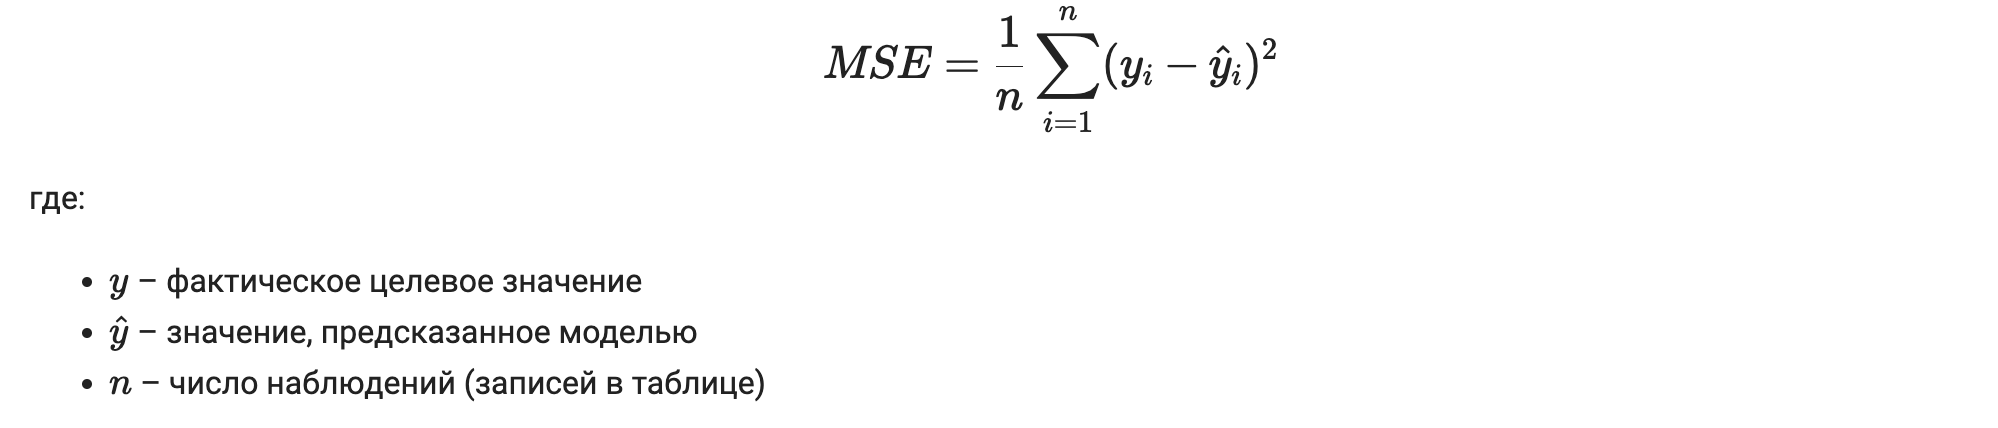

**Проблемы MSE**

* MSE достаточно плохо интерпретируется, поскольку не ограничена сверху. Например, MSE = 10 это хорошее или плохое значение? Без дополнительного анализа этого не понять. Например, если целевая переменная принимает значения от 0 до 1, то это плохой показатель,  а если целевая переменная лежит в интервале от 10000 до 100000, то хороший.
* Во-вторых, MSE возводит ошибки в квадрат, а значит сильнее штрафует за большие отклонения, и поэтому более чувствительна к выбросам.

**Mean Absolute Error (MAE)**

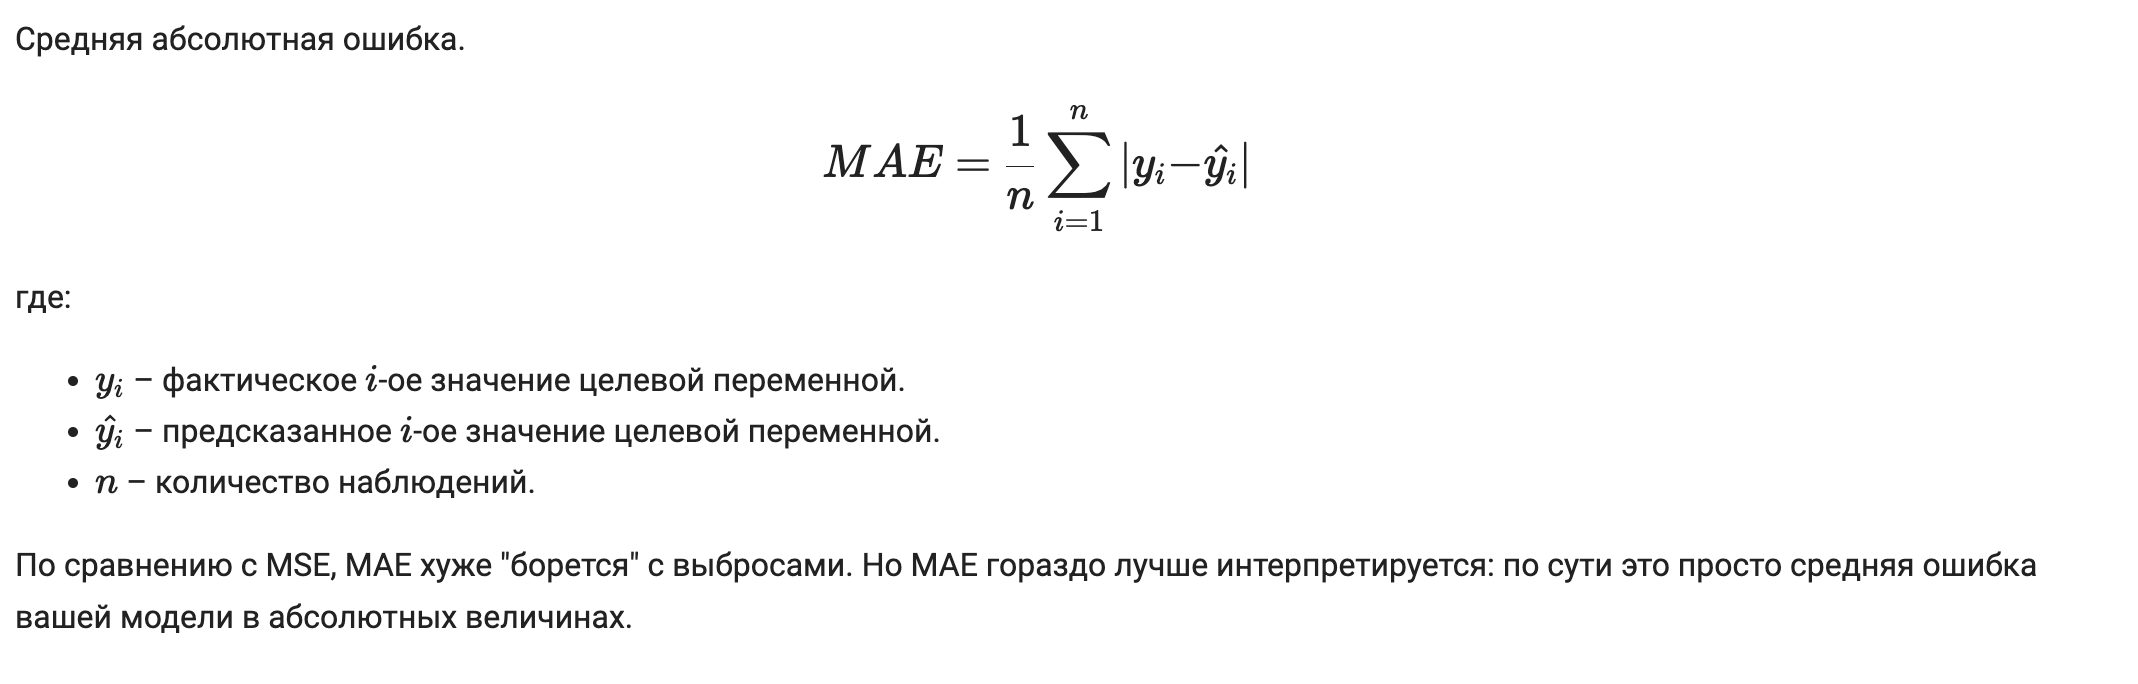

**Root Mean Squared Error (RMSE)**

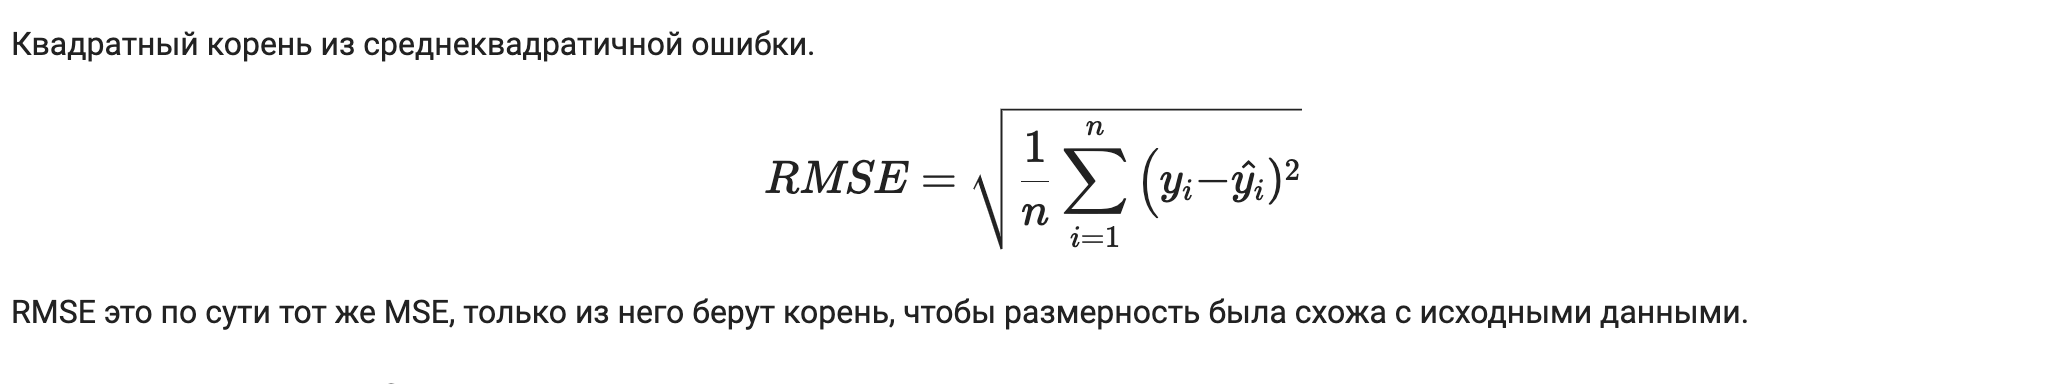

**Коэффициент R^2**

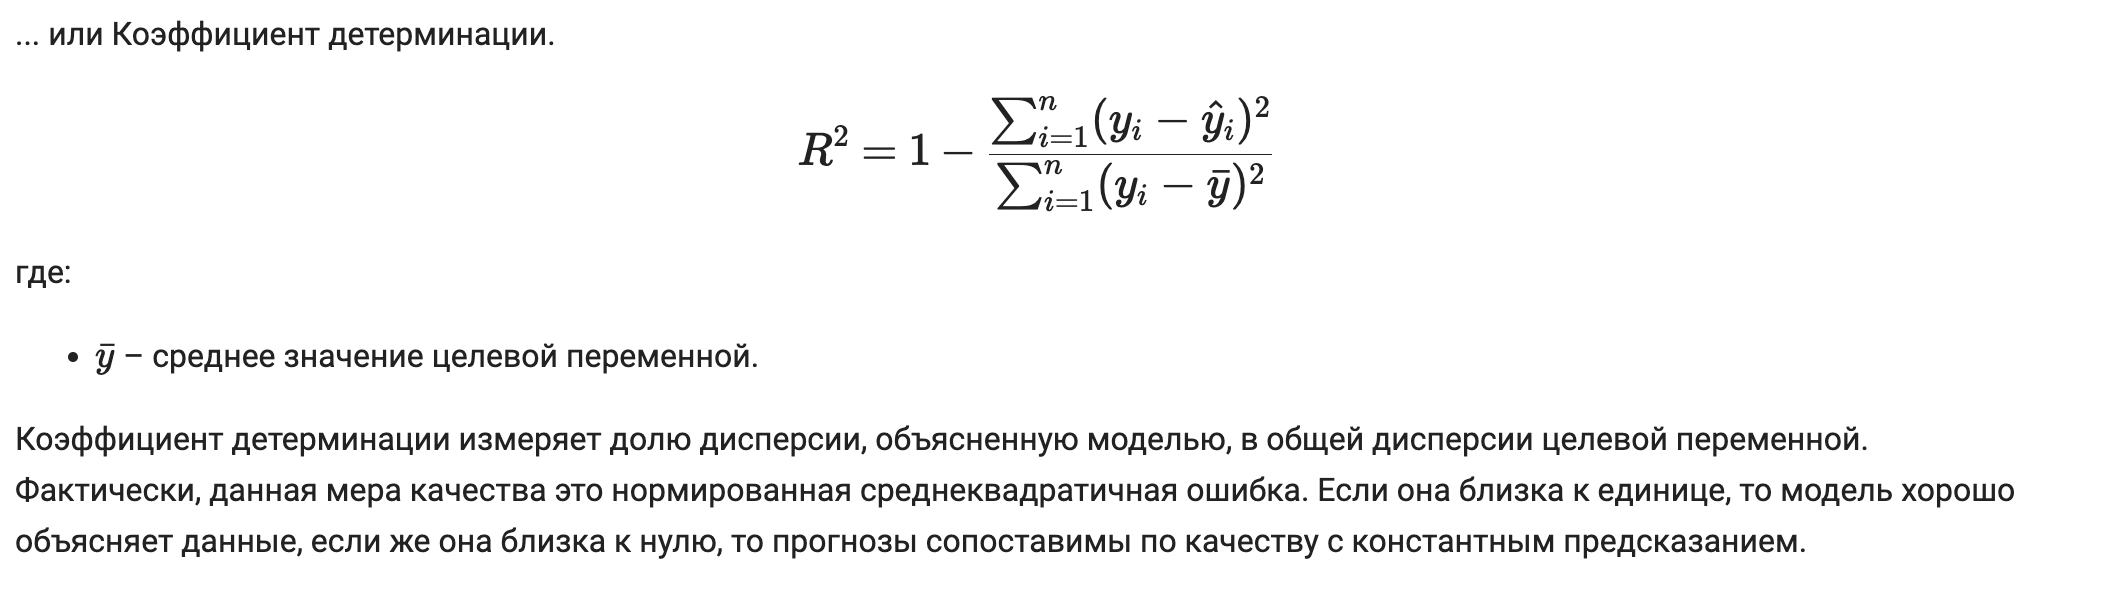

Он показывает, какую долю общей вариации данных модель может объяснить.

Проще говоря, R^2 показывает, насколько хорошо наша модель предсказывает реальные данные.

Вот простой способ понять его:

* R^2 равен 0: это означает, что наша модель не объясняет вариацию данных вообще. В этом случае наши прогнозы не лучше, чем если бы мы просто взяли среднее значение всех наблюдений.

* R^2 равен 1: это означает, что наша модель идеально объясняет вариацию данных. В этом случае все наши прогнозы точно соответствуют реальным значениям.

* R^2 между 0 и 1: большинство моделей будет где-то здесь. Значение, близкое к 1, означает, что модель довольно хороша в объяснении вариации данных. Значение, близкое к 0, означает, что модель не очень хороша в этом.

Однако важно помнить, что даже модель с высоким значением R^2 может быть непригодной, если она не соответствует основным предположениям регрессионного анализа, или если есть другие, более подходящие модели.

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  0.39041993106645506
MSE:  0.26695309055609834
R2 score:  0.6816044229192912


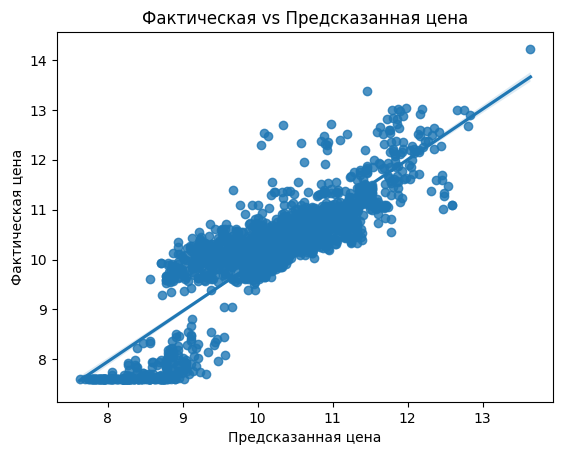

In [61]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Предсказанная цена")
plt.ylabel('Фактическая цена')
plt.title("Фактическая vs Предсказанная цена")
plt.show()

In [110]:
pred_actual_transformed = np.expm1(pred)
y_test_actual_transformed = np.expm1(y_test)

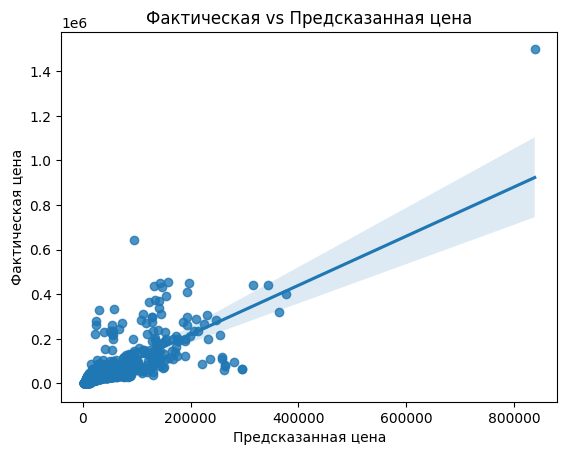

In [111]:
sns.regplot(x=pred_actual_transformed, y=y_test_actual_transformed)
plt.xlabel("Предсказанная цена")
plt.ylabel('Фактическая цена')
plt.title("Фактическая vs Предсказанная цена")
plt.show()

## Базовое решение

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)

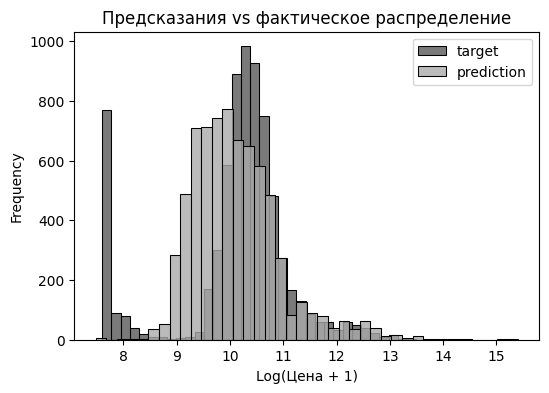

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Частота')
plt.xlabel('Log(Цена + 1)')
plt.title('Предсказания vs фактическое распределение')

plt.show()

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.7554192603920132

In [ ]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [ ]:
rmse(y_val, y_pred)

0.761653099130156

## Простое создание признаков

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058299


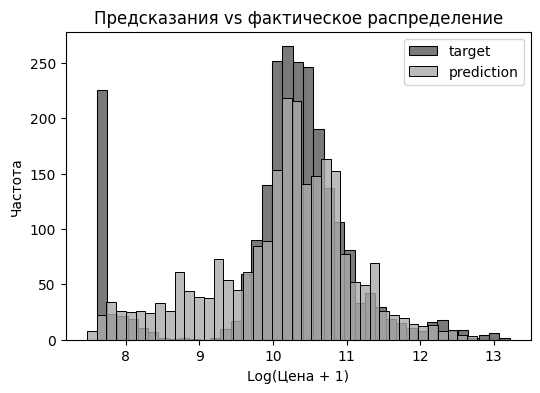

In [ ]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Частота')
plt.xlabel('Log(Цена + 1)')
plt.title('Предсказания vs фактическое распределение')

plt.show()

In [ ]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.5076038849556795


In [ ]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.4748256737223095


In [ ]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924003
validation: 0.4685879194658534


In [ ]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [ ]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [ ]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [ ]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 113.20645472118994
validation: 55.22691647401435


In [ ]:
w_0

8115744691019874.0

## Регуляризация (Regularization)

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)

In [ ]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 8115744691019874.00, -7.10, -8115744691023588.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 113.20645472118994
val 55.22691647401435


In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.464312489456461
val 0.4602394963124682


In [ ]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602251277547402
0.0001 0.4602254931319512
 0.001 0.4602267628312077
  0.01 0.4602394963124682
   0.1 0.4603700695819783
     1 0.4618298042652329
     5 0.46840796275321883
    10 0.4757248100695211


In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.4602394963124682
test: 0.4571813679271304


## Использование модели

In [ ]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [ ]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

28294.135929457443

In [ ]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202
